# Práctica 1
## Erik Juárez Guerrero 

# Parte 1 - Funciones
La descripción detallada de cada funciones se encuentra en su docstring.

## crea_un_grafo_completo()
Esta funcón recibe un número entero y regresa una diccionario que representa un grafo, sus llaves son los nodos y los valores son conjuntos de nodos adyasentes. El grafo que se regresa es del tipo K_n es decir cada nodo es ayacente con el resto. 

In [51]:
def crea_un_grafo_completo(n):
    """
    Resibe un número entero para regresar un grafo del tipo K_n.
    (todos los nodos estan relacionados entre ellos.)

    Parámetros
    ----------
    n : TIPO. entero mayor a cero
        DESCRIPCIÓN. Es el número de nodos del grafo.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Caundo no se pasa un entero por parámetro.
    ValueError
        DESCRIPCIÓN. Cuando el entero no es mayor a cero.

    Valor de retorno
    ----------------
    k_n : TIPO. diccionario
        DESCRIPCiÓN. Grafo K_n es un diccionario cuyos valores son conjuntos
        que representan los enlaces a otros nodos, cada elementp del conjunto
        es un nodo relacionado.

    """
    
    # validación del parámetro de entrada
    if type(n) is not int:
        raise TypeError("el parámetro que recive crea_un_grafo_completo() tiene que ser un entero positivo.")
    if n < 1:
        raise ValueError("el parámetro que recive crea_un_grafo_completo() tiene que ser mayot a cero.")
        
    # el grafo vacío
    k_n = { }
   
    # contrucción del grafo
    for i in range(n):
        
        # conjunto de nodos vacío, es el valor que se gurdará en la clave i 
        # en el diccionario
        ady = set()
        
        # se contruye el conjunto de nodos adyasentes
        for j in range(n):
            if i != j:
                ady.add(j)
        k_n[i] = ady
    
    return k_n

## calcula_grados_de_entrada()
Esta función recibe un diccionario que representa una gráfica dirigida, regresa un diccionario cuyas llaves son los nodos del grafo y sus valores los grados de entrada de los nodos.

In [52]:
def calcula_grados_de_entrada(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un 
    diccionario donde sus llaves son los nodos de la gráfica y los valores son
    el grado de entrada de ese nodo.

    Parámetros
    ----------
    d_grafica : TIPO. diccionario
        DESCRIPCIÓN. Gráfica dirigida, las claves representan los nodos y los 
        valores son conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Valor de retorno
    ----------------
    deg_in : TIPO. diccionario
        DESCRIPCIÓN. Las llaves de este diccionario son nodos y sus valores
        son entero que indican el grado de entrada de los nodos.

    """
    
    # validación del parámetro de entrada
    if type(d_grafica) is not dict:
        raise TypeError("el parámetro que recive calcula_grados_de_entrada() tiene que ser un diccionario.")
        
    # valor de retorno es diccionario vacío
    deg_in = { }
    
    # contrucón de la tabla   
    for k in d_grafica.keys():
        k_deg = 0
        
        # verifica que nodos se enlazan al nodo que recorre actualmente
        for v in d_grafica.values():
            ady = list(v)
            k_deg += ady.count(k)
            
        deg_in[k] = k_deg
        
        
    return deg_in

## dist_grados_de_entrada()
Esta funcón recibe un diccionario que representa una gráfica dirigida, y regresa otro diccionario con la distribución donde sus llaves son los grados de entrada y los valoes son la cantidad de esos grados que se encuentran en la gráfica dirigida.

In [53]:
def dist_grados_de_entrada(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un 
    diccionario donde sus llaves son los grados de salida de la gráfica y los 
    valores son la frecuencia de los grados de entrada.

    Parámetros
    ----------
    d_grafica : TIPO. diccionario
        DESCRIPCIÓN. Gráfica dirigida, las claves representan los nodos y los 
        valores son conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Valor de retorno
    ----------------
    distr : TIPO. diccionario
            DESCRIPCIÓN. Las llaves de este diccionario son grados de salida y 
            sus valores son entero que indican la frecuencia de los grados de 
            entrada.
    """
    # TODO: ¿es posible optimisar? 
    
    # validación del parámetro de entrada
    if type(d_grafica) is not dict:
        raise TypeError("el parámetro que recive dist_grados_de_entrada() tiene que ser un diccionario.")

    # obtiene la lista de los grados de entrada
    deg_in = list(calcula_grados_de_entrada(d_grafica).values())
    
    # umbral de grados a buscar en la lista
    deg_max = max(deg_in)
    
    # el valor de retorno es un diccionario vacío donde se gurdaran los datos
    distr = { }
    
    # recorre la lista para crear una tabla de distribución
    for i in range(deg_max + 1):
        
        # cuenta cuantos veces se encuentra el grado actual en la lista
        deg_count = deg_in.count(i)
        
        # TODO ¿Es necesario omitir los que son cero?
        # se resuelve agregando:
        # if deg_count != 0:
        distr[i] = deg_count
    
    return distr

## dist_norm_entrada()
Esta función recibe un diccionario que representa una gráfica dirigida y regresa un diccionario donde sus llaves son los grados de entrada de la gráfica y los valores son la frecuencia normalizada de los grados de entrada.

In [54]:
def dist_normalizada_entrada(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un 
    diccionario donde sus llaves son los grados de entrada de la gráfica y los 
    valores son la frecuencia normalizada de los grados de entrada.

    Parámetros
    ----------
    d_grafica : TIPO. diccionario
        DESCRIPCIÓN. Gráfica dirigida, las claves representan los nodos y los 
        valores son conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Valor de retorno
    ----------------
    distr_norm : TIPO. diccionario
        DESCRIPCIÓN. Las llaves de este diccionario son grados de entrada y sus 
        valores son flotantes que indican la frecuencia normalizada de los 
        grados de entrada.
    """
    
    # validación del parámetro de entrada
    if type(d_grafica) is not dict:
        raise TypeError("el parámetro que recive dist_normalizada_entrada() tiene que ser un diccionario.")

    # distribución de los grados de entrada
    dist_in = dist_grados_de_entrada(d_grafica)
    total = sum(list(dist_in.values()))
    
    # el valor de retorno es un diccionario vacío donde se gurdaran los datos
    distr_norm = { }
    
    # se recorre el diccionario de distribución para crear un diccionario con
    # la distrubución normalizada 
    for k, v in dist_in.items():
        deg_in_norm = v/total
        distr_norm[k] = deg_in_norm
    
    return distr_norm

Se importa la libreria matplotlib que es útil para renderizar gráficas.

In [55]:
import matplotlib.pyplot as plt

## grafita_distr_entrada()
Esta función recibe un diccionario que contenga la distrubución de los grados de entrada de un grafo Renderiza una figura con la gráfica de la distribución.

In [56]:
def grafica_distr_entrada(distr):
    """
    Recibe un diccionario que contenga la distrubución de los grados de 
    entrada de un grafo. Renderiza una figura con la gráfica de la 
    distribución.

    Parámetros
    ----------
    distr : dicccionario
        DESCRIPCIÓN. El diccionario contiene como valores la distrubución de 
        los grados de entrada nodales(enteros) de un gráfica dirigida.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Returns
    -------
    None.
        Se muestra la figura, pero el valor de retorno es None.
    """
    
    # validación del parámetro de entrada
    if type(distr) is not dict:
        raise TypeError("el parámetro que recive grafica_distr_entrada() tiene que ser un diccionario.")
    
    valores_x = list(distr.keys())
    valores_y = list(distr.values())
    
    plt.plot(valores_x, valores_y, marker='o')
    plt.xlabel("Grado nodal")
    plt.ylabel("Número de nodos")
    plt.title("Distribución de grados de entrada")
    # plt.show()
    return

## grafica_distr_norm_entrada()
Esta función recibe un diccionario que contenga la distrubución normalizada de los grados de entrada de un grafo Renderiza una figura con la gráfica de la distribución normalizada.

In [57]:
def grafica_distr_norm_entrada(distr_norm):
    """
    Recibe un diccionario que contenga la distrubución normalizada de los 
    grados de entrada de un grafo Renderiza una figura con la gráfica de la
    distribución normalizada.

    Parámetros
    ----------
    distr : dicccionario
        DESCRIPCIÓN. El diccionario contiene como valores la distrubución 
        normalizada de los grados de entrada nodales(flotantes) de un gráfica 
        dirigida.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Returns
    -------
    None.
        Se muestra la figura, pero el valor de retorno es None.
    """
    
    # validación del parámetro de entrada
    if type(distr_norm) is not dict:
        raise TypeError("el parámetro que recive grafica_distr_norm_entrada() tiene que ser un diccionario.")
        
    valores_x = list(distr_norm.keys())
    valores_y = list(distr_norm.values())
    
    plt.plot(valores_x, valores_y, marker='o')
    plt.xlabel("Grado nodal")
    plt.ylabel("Número de nodos")
    plt.title("Distribución Normalizada de grados de entrada")
    # plt.show()
    
    return

# Segunda parte - Datos
se crea este diccionario que representa la gráfica que se muestra en el documento de la práctica.

In [58]:
graf1 = {1: {2}, 2: {4}, 3: {2}, 4: {1, 3, 5}, 5: {2, 4, 6}, 6: {1}}

# Tercera parte - Ejecución
Se utilizan las funciones para mostrar las gráficas de distribución de entrada y distribución normalizada de grados de entrada.

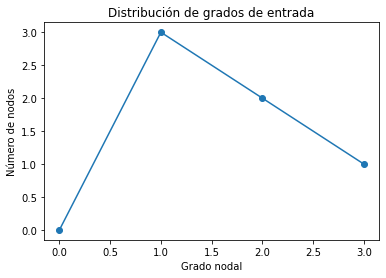

In [59]:
graf1_distr = dist_grados_de_entrada(graf1)
grafica_distr_entrada(graf1_distr)

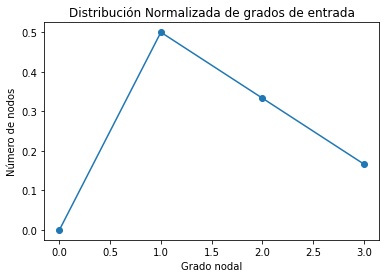

In [60]:
graf1_distr_norm = dist_normalizada_entrada(graf1)
grafica_distr_norm_entrada(graf1_distr_norm)

# Cuarta parte - Ejecución
Se generaro una gráfica completa k_n con n= 6 y se utilizan las funciones para mostrar las gráficas de distribución de entrada y distribución normalizada de grados de entrada.

In [61]:
graf2 = crea_un_grafo_completo(6)
print (graf2)

{0: {1, 2, 3, 4, 5}, 1: {0, 2, 3, 4, 5}, 2: {0, 1, 3, 4, 5}, 3: {0, 1, 2, 4, 5}, 4: {0, 1, 2, 3, 5}, 5: {0, 1, 2, 3, 4}}


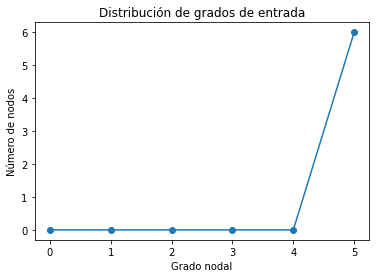

In [62]:
graf2_distr = dist_grados_de_entrada(graf2)
grafica_distr_entrada(graf2_distr)

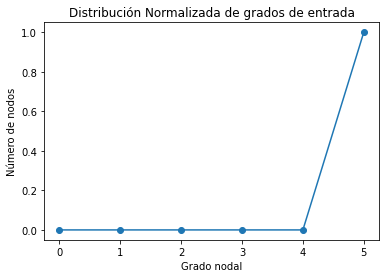

In [63]:
graf2_distr_norm = dist_normalizada_entrada(graf2)
grafica_distr_norm_entrada(graf2_distr_norm)

# Apéndice 'A' - Funciones Extras
Se desarrollaron las funcones que corresponden a los grados de salida, no forman parte de la práctica pero se añadieron por considerarse útiles, se omite su documentación en el Notebook pero cuentan con útiles docstrings y comentarios

## calcula_grados de salida()

In [64]:
def calcula_grados_de_salida(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un 
    diccionario donde sus llaves son los nodos de la gráfica y los valores son
    el grado de salida de ese nodo.

    Parámetros
    ----------
    d_grafica : TIPO. diccionario
        DESCRIPCIÓN. Gráfica dirigida, las claves representan los nodos y los 
        valores son conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Valor de retorno
    ----------------
    deg_out : TIPO. diccionario
        DESCRIPCIÓN. Las llaves de este diccionario son nodos y sus valores
        son entero que indican el grado de salida de los nodos.

    """
    
    # validación del parámetro de entrada
    if type(d_grafica) is not dict:
        raise TypeError("el parámetro que recive calcula_grados_de_salida() tiene que ser un diccionario.")
        
    # el valor de retorno es un diccionario vacío donde se gurdaran los datos
    deg_out = { }
        
    # contrucón de la tabla   
    for k, v in d_grafica.items():
        
        # verificacada a cuantos nodos se enlaza al nodo que recorre actualmente
        deg_out[k] = len(v)
        
    return deg_out

## dist_grados_de_salida()

In [65]:
def dist_grados_de_salida(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un 
    diccionario donde sus llaves son los grados de salida de la gráfica y los 
    valores son la frecuencia de los grados de salida.

    Parámetros
    ----------
    d_grafica : TIPO. diccionario
        DESCRIPCIÓN. Gráfica dirigida, las claves representan los nodos y los 
        valores son conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Valor de retorno
    ----------------
    distr : TIPO. diccionario
        DESCRIPCIÓN. Las llaves de este diccionario son grados de salida y sus 
        val ores son entero que indican la frecuencia de los grados de salida.
        
    """
    # TODO: ¿es posible optimisar? 
    
    # validación del parámetro de entrada
    if type(d_grafica) is not dict:
        raise TypeError("el parámetro que recive dist_grados_de_salida() tiene que ser un diccionario.")

    # obtiene la lista de los grados de entrada
    deg_out = list(calcula_grados_de_salida(d_grafica).values())
    
    # umbral de grados a buscar en la lista
    deg_max = max(deg_out) 
    
    # el valor de retorno es un diccionario vacío donde se gurdaran los datos
    distr = { }
    
    # recorre la lista para crear una tabla de distribución
    for i in range(deg_max + 1):
        
        # cuenta cuantos veces se encuentra el grado actual en la lista
        deg_count = deg_out.count(i)
        
        # TODO ¿Es necesario omitir los que son cero?
        # se resuelve agregando:
        # if deg_count != 0:
        distr[i] = deg_count
    
    return distr

## dist_normalizada_salida()

In [66]:
def dist_normalizada_salida(d_grafica):
    """
    Recibe un diccionario que representa una gráfica dirigida y regresa un 
    diccionario donde sus llaves son los grados de salida de la gráfica y los 
    valores son la frecuencia normalizada de los grados de salida.

    Parámetros
    ----------
    d_grafica : TIPO. diccionario
        DESCRIPCIÓN. Gráfica dirigida, las claves representan los nodos y los 
        valores son conjunto de los nodos a los que se conectan.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Valor de retorno
    ----------------
    distr_norm : TIPO. diccionario
        DESCRIPCIÓN. Las llaves de este diccionario son grados de salida y sus 
        valores son flotantes que indican la frecuencia normalizada de los 
        grados de salida.
    """
    
    # validación del parámetro de entrada
    if type(d_grafica) is not dict:
        raise TypeError("el parámetro que recive dist_normalizada_salida() tiene que ser un diccionario.")

    # distribución de los grados de salida
    dist_out = dist_grados_de_salida(d_grafica)
    total = sum(list(dist_out.values()))
    
    # el valor de retorno es un diccionario vacío donde se gurdaran los datos
    distr_norm = { }
    
    # se recorre el diccionario de distribución para crear un diccionario con
    # la distrubución normalizada 
    for k, v in dist_out.items():
        deg_out_norm = v/total
        distr_norm[k] = deg_out_norm
    
    return distr_norm

## grafica_distr_salida()

In [67]:
def grafica_distr_salida(distr):
    """
    Recibe un diccionario que contenga la distrubución de los grados de salida 
    de un grafo. Renderiza una figura con la gráfica de la distribución.

    Parámetros
    ----------
    distr : dicccionario
        DESCRIPCIÓN. El diccionario contiene como valores la distrubución de 
        los grados de salida nodales(enteros) de un gráfica dirigida.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Returns
    -------
    None.
        Se muestra la figura, pero el valor de retorno es None.
    """
    
    # validación del parámetro de entrada
    if type(distr) is not dict:
        raise TypeError("el parámetro que recive grafica_distr_salida() tiene que ser un diccionario.")
    
    valores_x = list(distr.keys())
    valores_y = list(distr.values())
    
    plt.plot(valores_x, valores_y, marker='o')
    plt.xlabel("Grado nodal")
    plt.ylabel("Número de nodos")
    plt.title("Distribución de grados de salida")
    # plt.show()
    return

## grafica_distr_nom_salida()

In [68]:
def grafica_distr_norm_salida(distr_norm):
    """
    Recibe un diccionario que contenga la distrubución normalizada de los 
    grados de salida de un grafo Renderiza una figura con la gráfica de la
    distribución normalizada.

    Parámetros
    ----------
    distr : dicccionario
        DESCRIPCIÓN. El diccionario contiene como valores la distrubución 
        normalizada de los grados de salida nodales(flotantes) de un gráfica 
        dirigida.

    Excepción
    ---------
    TypeError
        DESCRIPCIÓN. Cuando no resive un diccionario como parámetro.

    Returns
    -------
    None.
        Se muestra la figura, pero el valor de retorno es None.
    """
    
    # validación del parámetro de entrada
    if type(distr_norm) is not dict:
        raise TypeError("el parámetro que recive grafica_distr_norm_salida() tiene que ser un diccionario.")
        
    valores_x = list(distr_norm.keys())
    valores_y = list(distr_norm.values())
    
    plt.plot(valores_x, valores_y, marker='o')
    plt.xlabel("Grado nodal")
    plt.ylabel("Número de nodos")
    plt.title("Distribución Normalizada de grados de salida")
    # plt.show()
    
    return

Ejecución de las fucnciones con los datos de la práctica

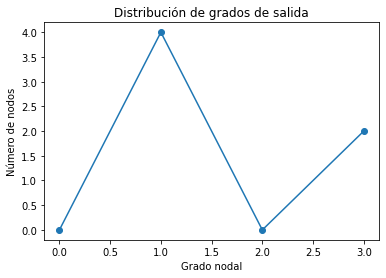

In [69]:
graf1_distr = dist_grados_de_salida(graf1)
grafica_distr_salida(graf1_distr)

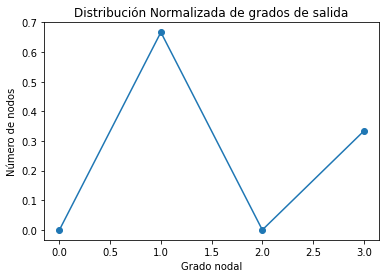

In [70]:
graf1_distr_norm = dist_normalizada_salida(graf1)
grafica_distr_norm_salida(graf1_distr_norm)